In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from windrose import WindroseAxes

In [2]:
# Load data into a pandas DataFrame
data = pd.read_csv('../data/togo-dapaong_qc.csv')
data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [3]:
# Summary statistics and missing values
data.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [4]:
# Missing values count per column
missing_values_counts = data.isnull().sum()
missing_values_counts

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [5]:
# List columns with > 5% missing values
threshold = 0.05 * len(data)
cols_missing_over_5pct = missing_values_counts[missing_values_counts > threshold]
display(cols_missing_over_5pct)

Comments    525600
dtype: int64

In [6]:
# Outlier detection and Basic cleaning
# columns GHI, DNI, DHI, ModA, ModB, WS, WSgust
# Z-score

columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df_zscores = data[columns_to_check].apply(zscore)

# Flag outliers with |Z| > 3
outliers = (df_zscores.abs() > 3)
print("Number of outliers per column:\n", outliers.sum())

# Optionally: mark rows with any outlier
data['outlier_flag'] = outliers.any(axis=1)


Number of outliers per column:
 GHI        305
DNI       1062
DHI       3415
ModA       137
ModB       206
WS        3510
WSgust    3915
dtype: int64


In [7]:
# handling missing values
for col in columns_to_check:
    median_val = data[col].median()
    data[col].fillna(median_val)


In [8]:
# Export cleaned data
data.to_csv('../data/togo_dapaong_cleaned.csv', index=False)

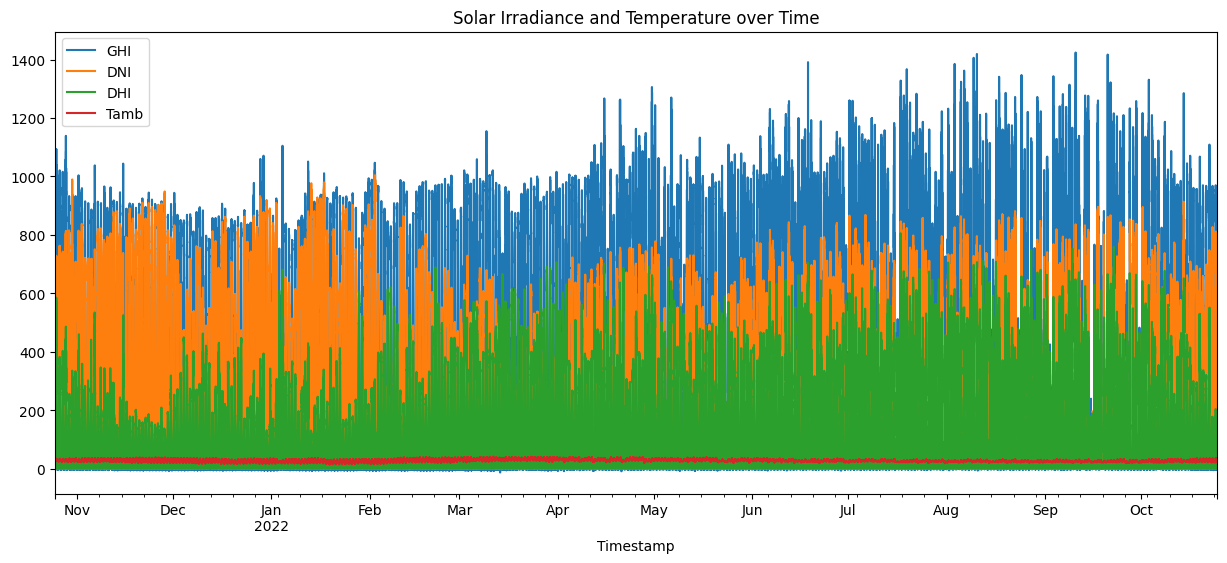

C:\Users\Mesfin\AppData\Local\Temp\ipykernel_13192\2660298898.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = data.resample('M').mean()


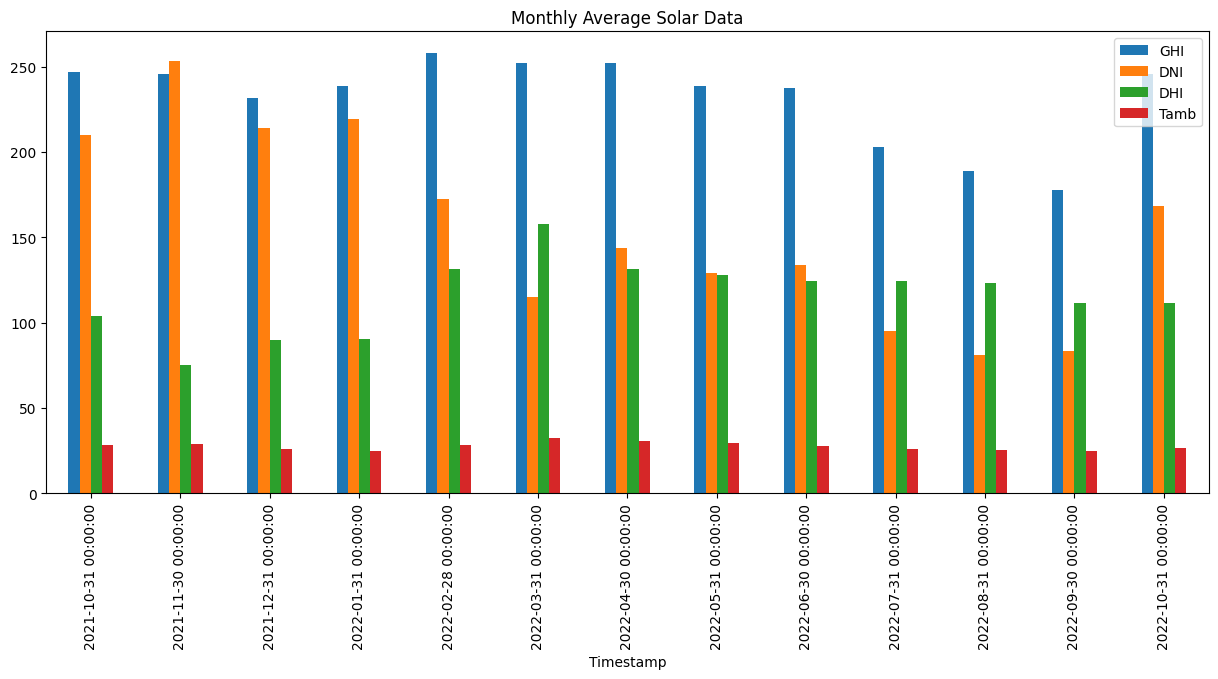

In [9]:
# Time series analysis

data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.set_index('Timestamp', inplace=True)

# Plot GHI, DNI, DHI, Tamb over time
data[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(15,6))
plt.title('Solar Irradiance and Temperature over Time')
plt.show()

# Aggregate monthly
df_monthly = data.resample('M').mean()
df_monthly[['GHI', 'DNI', 'DHI', 'Tamb']].plot(kind='bar', figsize=(15,6))
plt.title('Monthly Average Solar Data')
plt.show()


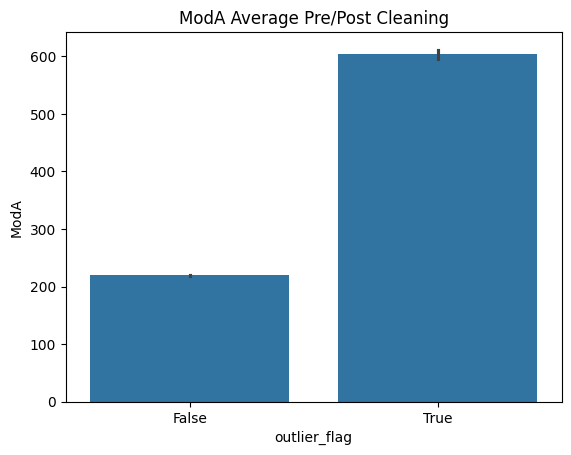

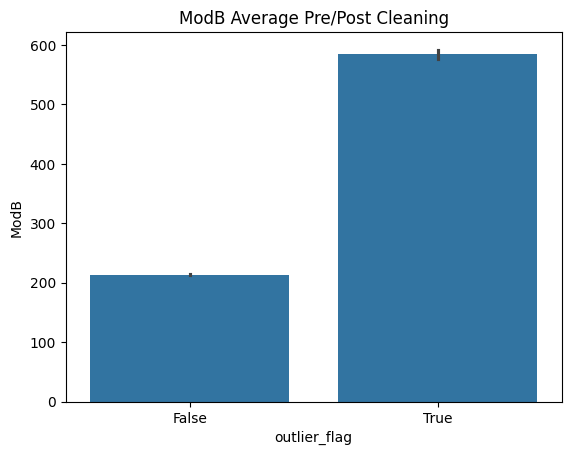

In [10]:
# Cleaning Impact
# Compare ModA & ModB averages pre/post cleaning (based on outlier_flag or missing data flag):
sns.barplot(data, x='outlier_flag', y='ModA')
plt.title('ModA Average Pre/Post Cleaning')
plt.show()

sns.barplot(data, x='outlier_flag', y='ModB')
plt.title('ModB Average Pre/Post Cleaning')
plt.show()


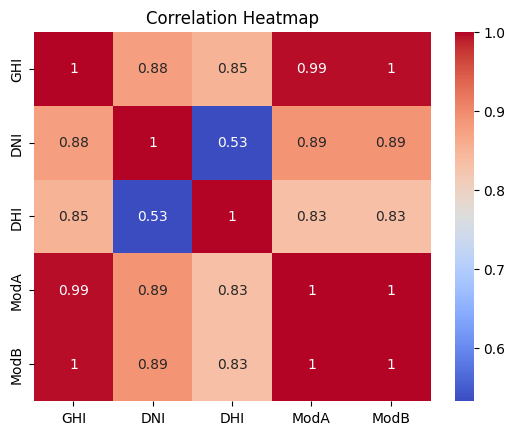

In [11]:
# Correlation & Relationships
# Correlation heatmap
corr_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']
corr = data[corr_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


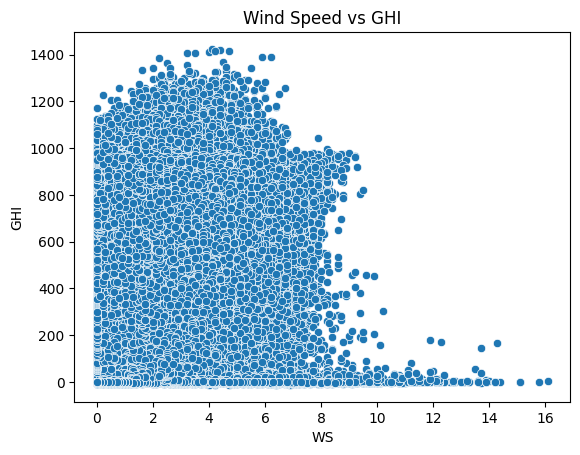

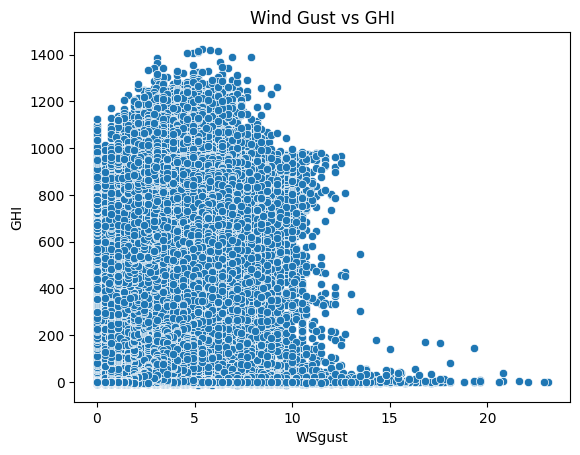

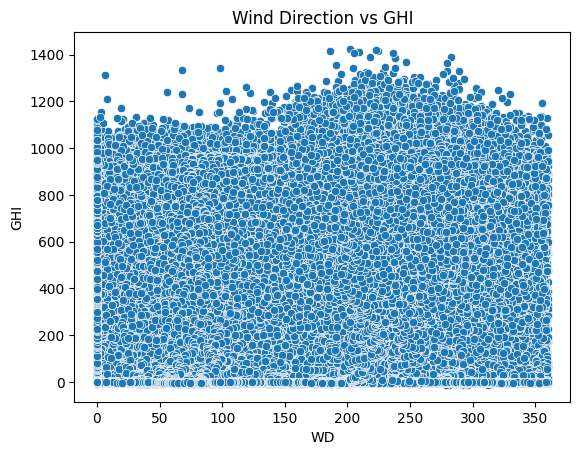

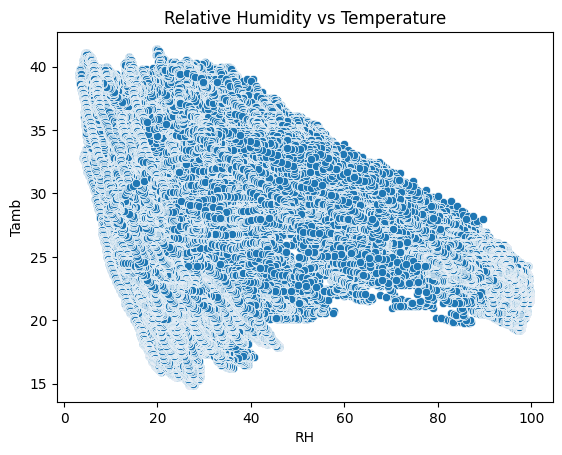

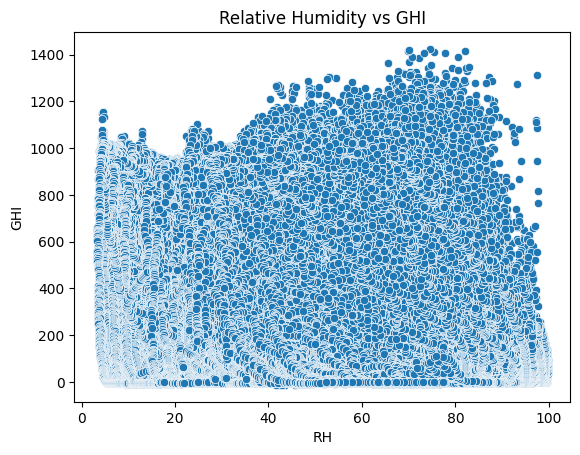

In [12]:
# Scatter plots
sns.scatterplot(data, x='WS', y='GHI')
plt.title('Wind Speed vs GHI')
plt.show()

sns.scatterplot(data, x='WSgust', y='GHI')
plt.title('Wind Gust vs GHI')
plt.show()

sns.scatterplot(data, x='WD', y='GHI')
plt.title('Wind Direction vs GHI')
plt.show()

sns.scatterplot(data, x='RH', y='Tamb')
plt.title('Relative Humidity vs Temperature')
plt.show()

sns.scatterplot(data, x='RH', y='GHI')
plt.title('Relative Humidity vs GHI')
plt.show()


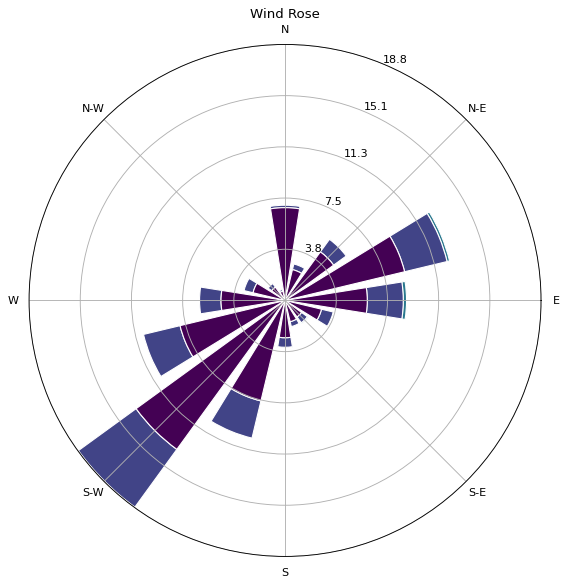

In [13]:
# Wind & Distribution Analysis
ax = WindroseAxes.from_ax()
ax.bar(data['WD'], data['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_title('Wind Rose')
plt.show()

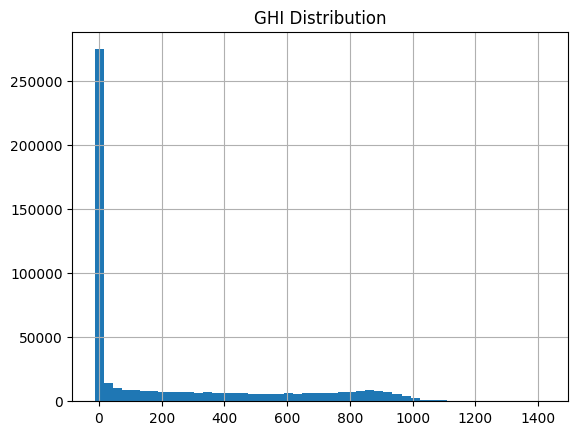

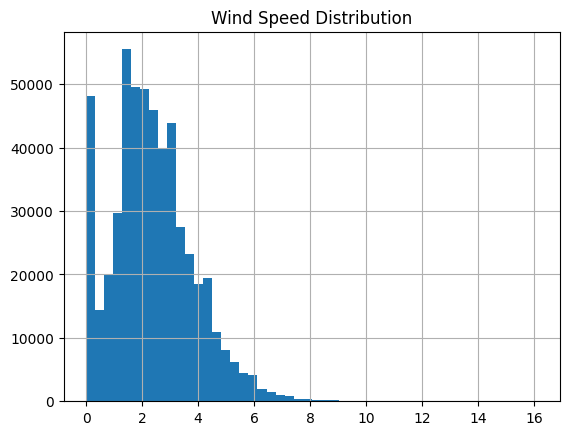

In [14]:
# Histograms:
data['GHI'].hist(bins=50)
plt.title('GHI Distribution')
plt.show()

data['WS'].hist(bins=50)
plt.title('Wind Speed Distribution')
plt.show()


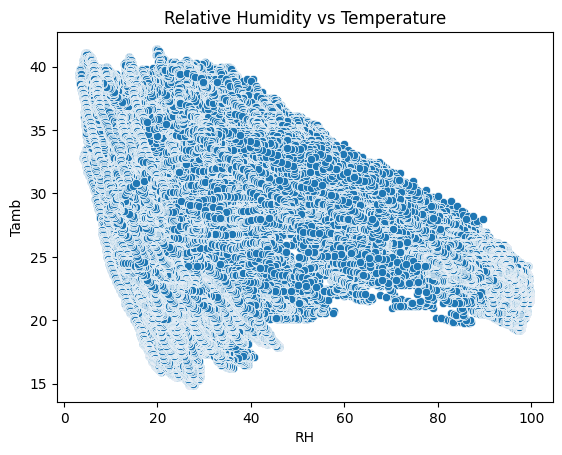

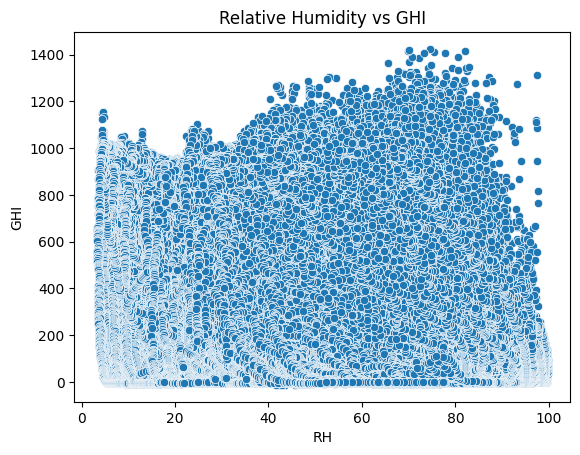

In [15]:
# Temprature Analysis
# Check influence of RH on temperature and solar radiation:
sns.scatterplot(data, x='RH', y='Tamb')
plt.title('Relative Humidity vs Temperature')
plt.show()

sns.scatterplot(data, x='RH', y='GHI')
plt.title('Relative Humidity vs GHI')
plt.show()

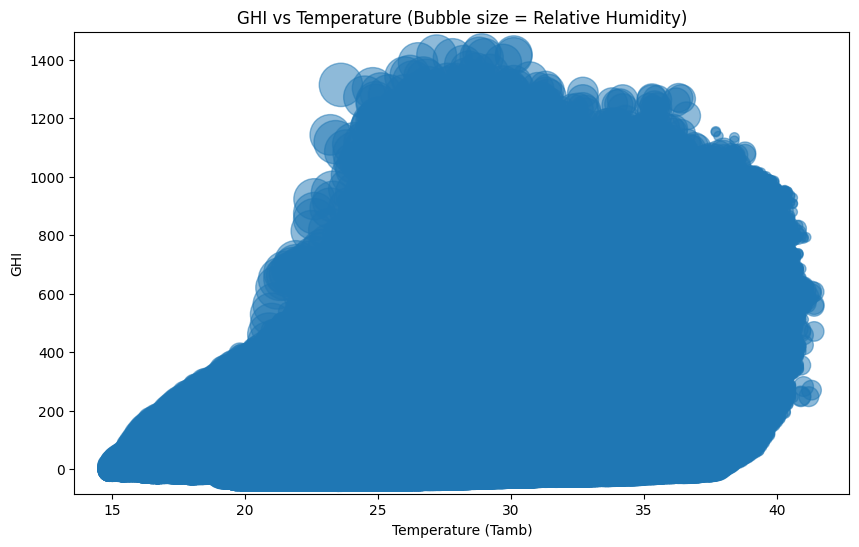

In [16]:
# Bubble chart
plt.figure(figsize=(10,6))
plt.scatter(data['Tamb'], data['GHI'], s=data['RH']*10, alpha=0.5)
plt.xlabel('Temperature (Tamb)')
plt.ylabel('GHI')
plt.title('GHI vs Temperature (Bubble size = Relative Humidity)')
plt.show()